In [ ]:
import numpy as np
import pandas as pd
bikes =  pd.read_pickle('BikeDataImp.pkl')
bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,0,True,644,0,Chilly,0
8756,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,0,True,359,0,Chilly,0
8757,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,0,True,1236,0,Chilly,0
8758,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,0,True,628,1,Chilly,0


In [ ]:
temp_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Temperature'].mean()
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()

In [ ]:
bikes_week = pd.concat([temp_mean, bikes_sum], axis=1)
first_five = bikes_week.iloc[:5]
first_five

,Temperature,Rental Count
week,,
1,-2.694940,39441
2,-5.079762,30871
3,2.662500,42193
4,-10.038690,23079
5,-5.650595,28415


In [ ]:
first_five['X-Mx'] = first_five['Temperature'] - first_five['Temperature'].mean()
first_five['Y-My'] = first_five['Rental Count'] - first_five['Rental Count'].mean()
first_five

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Temperature,Rental Count,X-Mx,Y-My
week,,,,
1,-2.694940,39441,1.465357,6641.2
2,-5.079762,30871,-0.919464,-1928.8
3,2.662500,42193,6.822798,9393.2
4,-10.038690,23079,-5.878393,-9720.8
5,-5.650595,28415,-1.490298,-4384.8


In [ ]:
SSx = (first_five['X-Mx'] ** 2).sum()
SSy = (first_five['Y-My'] ** 2).sum()
SP = (first_five['X-Mx'] * first_five['Y-My']).sum()
SSx, SSy, SP

(86.31974305555556, 249778436.8, 139270.43345238097)

In [ ]:
r = SP / np.sqrt(SSx * SSy)
r

0.9484760874616524

In [ ]:
first_five['Temperature'].corr(first_five['Rental Count'])

0.9484760874616526

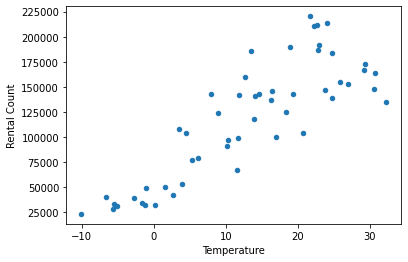

In [ ]:
bikes_week.plot('Temperature', 'Rental Count', kind='scatter')

In [ ]:
bikes_week['Temperature'].corr(bikes_week['Rental Count'])

0.8458075200534891

In [ ]:
bikes.corr()

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Holiday,Functioning Day,Rental Count,Normal Humidity,Good Weather
Hour,1.000000e+00,0.123610,-0.241644,0.285197,0.008715,-0.021516,-1.391486e-16,0.005439,0.345622,0.107503,0.073698
Temperature,1.236105e-01,1.000000,0.159793,-0.036418,0.050758,-0.217846,-5.570102e-02,-0.049849,0.454749,0.025467,0.206979
Humidity,-2.416438e-01,0.159793,1.000000,-0.336683,0.236397,0.108183,-5.027765e-02,-0.020800,-0.169085,-0.285947,-0.115874
Wind speed,2.851967e-01,-0.036418,-0.336683,1.000000,-0.019674,-0.003554,2.301677e-02,0.005037,0.097583,0.074964,0.032127
Rainfall,8.714642e-03,0.050758,0.236397,-0.019674,1.000000,0.008500,-1.426911e-02,0.002055,-0.103519,-0.095339,-0.042127
Snowfall,-2.151645e-02,-0.217846,0.108183,-0.003554,0.008500,1.000000,-1.259072e-02,0.032089,-0.120869,-0.067939,-0.054942
Holiday,-1.391486e-16,-0.055701,-0.050278,0.023017,-0.014269,-0.012591,1.000000e+00,-0.027624,-0.068822,-0.020156,0.029008
Functioning Day,5.439377e-03,-0.049849,-0.020800,0.005037,0.002055,0.032089,-2.762445e-02,1.000000,0.173437,0.002488,-0.101806
Rental Count,3.456218e-01,0.454749,-0.169085,0.097583,-0.103519,-0.120869,-6.882160e-02,0.173437,1.000000,0.128521,0.194224
Normal Humidity,1.075026e-01,0.025467,-0.285947,0.074964,-0.095339,-0.067939,-2.015629e-02,0.002488,0.128521,1.000000,0.440102


In [ ]:
humidity_week = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Humidity'].mean()
wind_week = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Wind speed'].mean()
bikes_week = pd.concat([bikes_week, humidity_week, wind_week], axis=1)

In [ ]:
bikes_week.corr()

,Temperature,Rental Count,Humidity,Wind speed
Temperature,1.000000,0.845808,0.584642,-0.420474
Rental Count,0.845808,1.000000,0.389963,-0.434142
Humidity,0.584642,0.389963,1.000000,-0.456225
Wind speed,-0.420474,-0.434142,-0.456225,1.000000


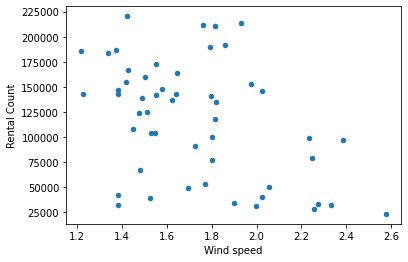

In [ ]:
bikes_week.plot('Wind speed', 'Rental Count', kind='scatter')

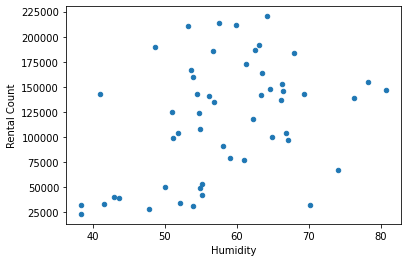

In [ ]:
bikes_week.plot('Humidity', 'Rental Count', kind='scatter')

In [ ]:
bikes_week.corr()['Rental Count'].apply(np.abs).sort_values()

Humidity        0.389963
Wind speed      0.434142
Temperature     0.845808
Rental Count    1.000000
Name: Rental Count, dtype: float64

In [ ]:
corr = bikes_week.corr()

In [ ]:
corr.abs()

,Temperature,Rental Count,Humidity,Wind speed
Temperature,1.000000,0.845808,0.584642,0.420474
Rental Count,0.845808,1.000000,0.389963,0.434142
Humidity,0.584642,0.389963,1.000000,0.456225
Wind speed,0.420474,0.434142,0.456225,1.000000


In [ ]:
corr.abs().unstack()

Temperature   Temperature     1.000000
              Rental Count    0.845808
              Humidity        0.584642
              Wind speed      0.420474
Rental Count  Temperature     0.845808
              Rental Count    1.000000
              Humidity        0.389963
              Wind speed      0.434142
Humidity      Temperature     0.584642
              Rental Count    0.389963
              Humidity        1.000000
              Wind speed      0.456225
Wind speed    Temperature     0.420474
              Rental Count    0.434142
              Humidity        0.456225
              Wind speed      1.000000
dtype: float64

In [ ]:
corr.abs().unstack().sort_values()

Rental Count  Humidity        0.389963
Humidity      Rental Count    0.389963
Temperature   Wind speed      0.420474
Wind speed    Temperature     0.420474
Rental Count  Wind speed      0.434142
Wind speed    Rental Count    0.434142
Humidity      Wind speed      0.456225
Wind speed    Humidity        0.456225
Temperature   Humidity        0.584642
Humidity      Temperature     0.584642
Temperature   Rental Count    0.845808
Rental Count  Temperature     0.845808
Temperature   Temperature     1.000000
Rental Count  Rental Count    1.000000
Humidity      Humidity        1.000000
Wind speed    Wind speed      1.000000
dtype: float64